In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import tensorflow as tf  
import os  
import numpy as np  
import cv2  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D,Activation
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from tensorflow.keras.utils import to_categorical

In [2]:
# Pass the path of the xml document 
tree = ET.parse('annotations\maksssksksss0.xml') 

# get the parent tag 
root = tree.getroot() 
print(root[0].text)
print(root[1].text)
print('Image Width: {}'.format(root[2][0].text))
print('Image Height: {}'.format(root[2][1].text))
print('Image Depth: {}'.format(root[2][2].text))

for i in range(4,len(root)):
    print(root[i][0].text)

images
maksssksksss0.png
Image Width: 512
Image Height: 366
Image Depth: 3
without_mask
with_mask
without_mask


In [2]:
ImgData=[]
for img in os.listdir('images'):
    path='annotations\{}.xml'.format(img[:-4])
    tree = ET.parse(path)
    root = tree.getroot() 
    new_Image=cv2.imread(os.path.join('images',img))
    for i in range(4,len(root)):
        label=root[i][0].text
        xmin=int(root[i][5][0].text)
        xmax=int(root[i][5][2].text)
        ymin=int(root[i][5][1].text)
        ymax=int(root[i][5][3].text)
        if (xmax-xmin)>=15 and (ymax-ymin)>=15:
            cropped_image=new_Image[ymin:ymax,xmin:xmax,:]
            cropped_image=cv2.resize(cropped_image,(40,40))
            cropped_image=cropped_image/255.0
            ImgData.append([cropped_image,label])        


In [3]:
import random
MaskData=ImgData
random.shuffle(MaskData)

'with_mask'

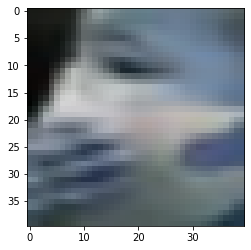

In [4]:

i=2
plt.imshow(MaskData[i][0])
MaskData[i][1]

In [5]:
len(MaskData),len(MaskData[0]),len(MaskData[0][0]),len(MaskData[0][0][0]),len(MaskData[0][0][0][0])

(2936, 2, 40, 40, 3)

In [6]:
X=[]
y=[]
for features,label in MaskData:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,40,40,3)
y=np.array(y)

In [7]:
X.shape[1:]

(40, 40, 3)

In [8]:
y.shape

(2936,)

In [9]:
np.unique(y)

array(['mask_weared_incorrect', 'with_mask', 'without_mask'], dtype='<U21')

In [10]:

  
# Encode labels in column 'species'.
y_encoded= label_encoder.fit_transform(y)
  
np.unique(y_encoded)

array([0, 1, 2], dtype=int64)

In [11]:

Y = to_categorical(y_encoded, 3)

In [12]:
Y.shape

(2936, 3)

In [14]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(3))
model.add(Activation('softmax'))


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X,Y,batch_size=32,validation_split=0.1,epochs=15)

Epoch 1/15
83/83 [==============================] - 8s 94ms/step - loss: 0.3424 - accuracy: 0.8834 - val_loss: 0.1965 - val_accuracy: 0.9320
Epoch 2/15
83/83 [==============================] - 8s 90ms/step - loss: 0.2032 - accuracy: 0.9364 - val_loss: 0.1714 - val_accuracy: 0.9422
Epoch 3/15
83/83 [==============================] - 8s 92ms/step - loss: 0.1819 - accuracy: 0.9417 - val_loss: 0.1511 - val_accuracy: 0.9524
Epoch 4/15
83/83 [==============================] - 8s 91ms/step - loss: 0.1742 - accuracy: 0.9425 - val_loss: 0.1865 - val_accuracy: 0.9320
Epoch 5/15
83/83 [==============================] - 7s 90ms/step - loss: 0.1523 - accuracy: 0.9516 - val_loss: 0.1696 - val_accuracy: 0.9456
Epoch 6/15
83/83 [==============================] - 9s 103ms/step - loss: 0.1343 - accuracy: 0.9527 - val_loss: 0.1452 - val_accuracy: 0.9524
Epoch 7/15
 8/83 [=>............................] - ETA: 6s - loss: 0.1111 - accuracy: 0.9531

KeyboardInterrupt: 

In [58]:
##Model for Human vs Non Human Subjects

In [13]:
import pickle
pickle_in=open(r"C:\Users\saurabh\Documents\Desktop\Neural Network and Deep Learning\CIFAR\X.pickle","rb")
NON_HUMANX=pickle.load(pickle_in)
pickle_in=open(r"C:\Users\saurabh\Documents\Desktop\Neural Network and Deep Learning\CIFAR\y.pickle","rb")
NON_HUMANy=pickle.load(pickle_in)


In [14]:
NON_HUMANX.shape

(50000, 32, 32, 3)

In [15]:
len(NON_HUMANy)

50000

In [16]:
ImgDataHUMAN=[]
for img in os.listdir('images'):
    path='annotations\{}.xml'.format(img[:-4])
    tree = ET.parse(path)
    root = tree.getroot() 
    new_Image=cv2.imread(os.path.join('images',img))
    for i in range(4,len(root)):
        label=1
        xmin=int(root[i][5][0].text)
        xmax=int(root[i][5][2].text)
        ymin=int(root[i][5][1].text)
        ymax=int(root[i][5][3].text)
        if (xmax-xmin)>=15 and (ymax-ymin)>=15:
            cropped_image=new_Image[ymin:ymax,xmin:xmax,:]
            cropped_image=cv2.resize(cropped_image,(32,32))
            cropped_image=cropped_image/255.0
            ImgDataHUMAN.append([cropped_image,label])        


In [17]:
len(ImgDataHUMAN)

2936

In [18]:
NON_HUMANX=np.divide(NON_HUMANX[:2936], 255.0)
NON_HUMANy=[0]*2936

In [19]:
NON_HUMANX.shape

(2936, 32, 32, 3)

In [20]:
for i in range(len(NON_HUMANy)):
    ImgDataHUMAN.append([NON_HUMANX[i],NON_HUMANy[i]])

In [21]:
import random
HUMANDATA=ImgDataHUMAN
random.shuffle(HUMANDATA)

In [22]:
X1=[]
y1=[]
for features,label in HUMANDATA:
    X1.append(features)
    y1.append(label)
X1=np.array(X1).reshape(-1,32,32,3)
y1=np.array(y1)

In [23]:
X1.shape

(5872, 32, 32, 3)

In [24]:
y1.shape

(5872,)

In [25]:
Y1 = to_categorical(y1, 2)

In [26]:
Y1.shape

(5872, 2)

In [75]:
human_model=Sequential()
human_model.add(Conv2D(64,(3,3),input_shape=X1.shape[1:]))
human_model.add(Activation('relu'))
human_model.add(MaxPool2D((2,2)))

human_model.add(Conv2D(64,(3,3),input_shape=X1.shape[1:]))
human_model.add(Activation('relu'))
human_model.add(MaxPool2D((2,2)))

human_model.add(Flatten())
human_model.add(Dense(64))
human_model.add(Activation('relu'))

human_model.add(Dense(2))
human_model.add(Activation('softmax'))


human_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
human_model.fit(X1,Y1,batch_size=32,validation_split=0.1,epochs=5)

Epoch 1/5
166/166 [==============================] - 11s 65ms/step - loss: 0.1095 - accuracy: 0.9582 - val_loss: 0.0267 - val_accuracy: 0.9898
Epoch 2/5
166/166 [==============================] - 11s 64ms/step - loss: 0.0249 - accuracy: 0.9909 - val_loss: 0.0462 - val_accuracy: 0.9881
Epoch 3/5
166/166 [==============================] - 11s 67ms/step - loss: 0.0232 - accuracy: 0.9938 - val_loss: 0.0324 - val_accuracy: 0.9881
Epoch 4/5
166/166 [==============================] - 11s 66ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0221 - val_accuracy: 0.9932
Epoch 5/5
166/166 [==============================] - 11s 64ms/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 0.0071 - val_accuracy: 0.9966


In [76]:
#human_model.save('HumanDetect.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: HumanDetect.model\assets


In [27]:
human_model=tf.keras.models.load_model('HumanDetect.model')

array([0.00778774, 0.9922123 ], dtype=float32)

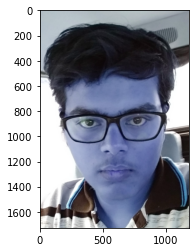

In [42]:
test=cv2.imread(r'F:\pictures\my mobile photos\IMG_20180502_162603 (2).jpg')
plt.imshow(test)
test=cv2.resize(test,(32,32))
test=test/255.0
test=test.reshape(1,32,32,3)
Pred_Val=human_model.predict([test])[0]
Pred_Val

#model.save('Mask12.96.model')

In [30]:
new_model=tf.keras.models.load_model('Mask12.96.model')

['mask_weared_incorrect']:0.0%
['with_mask']:0.0%
['without_mask']:100.0%


'without_mask'

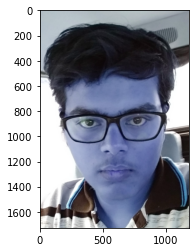

In [45]:
test=cv2.imread(r'F:\pictures\my mobile photos\IMG_20180502_162603 (2).jpg')
plt.imshow(test)
test=cv2.resize(test,(40,40))
test=test/255.0
test=test.reshape(1,40,40,3)
Pred_Val=new_model.predict([test])[0]
for i in range(len(Pred_Val)):
    print('{}:{}%'.format(label_encoder.inverse_transform([i]),round(Pred_Val[i]*100),2))
label_encoder.inverse_transform([np.where(Pred_Val==max(Pred_Val))[0][0]])[0]

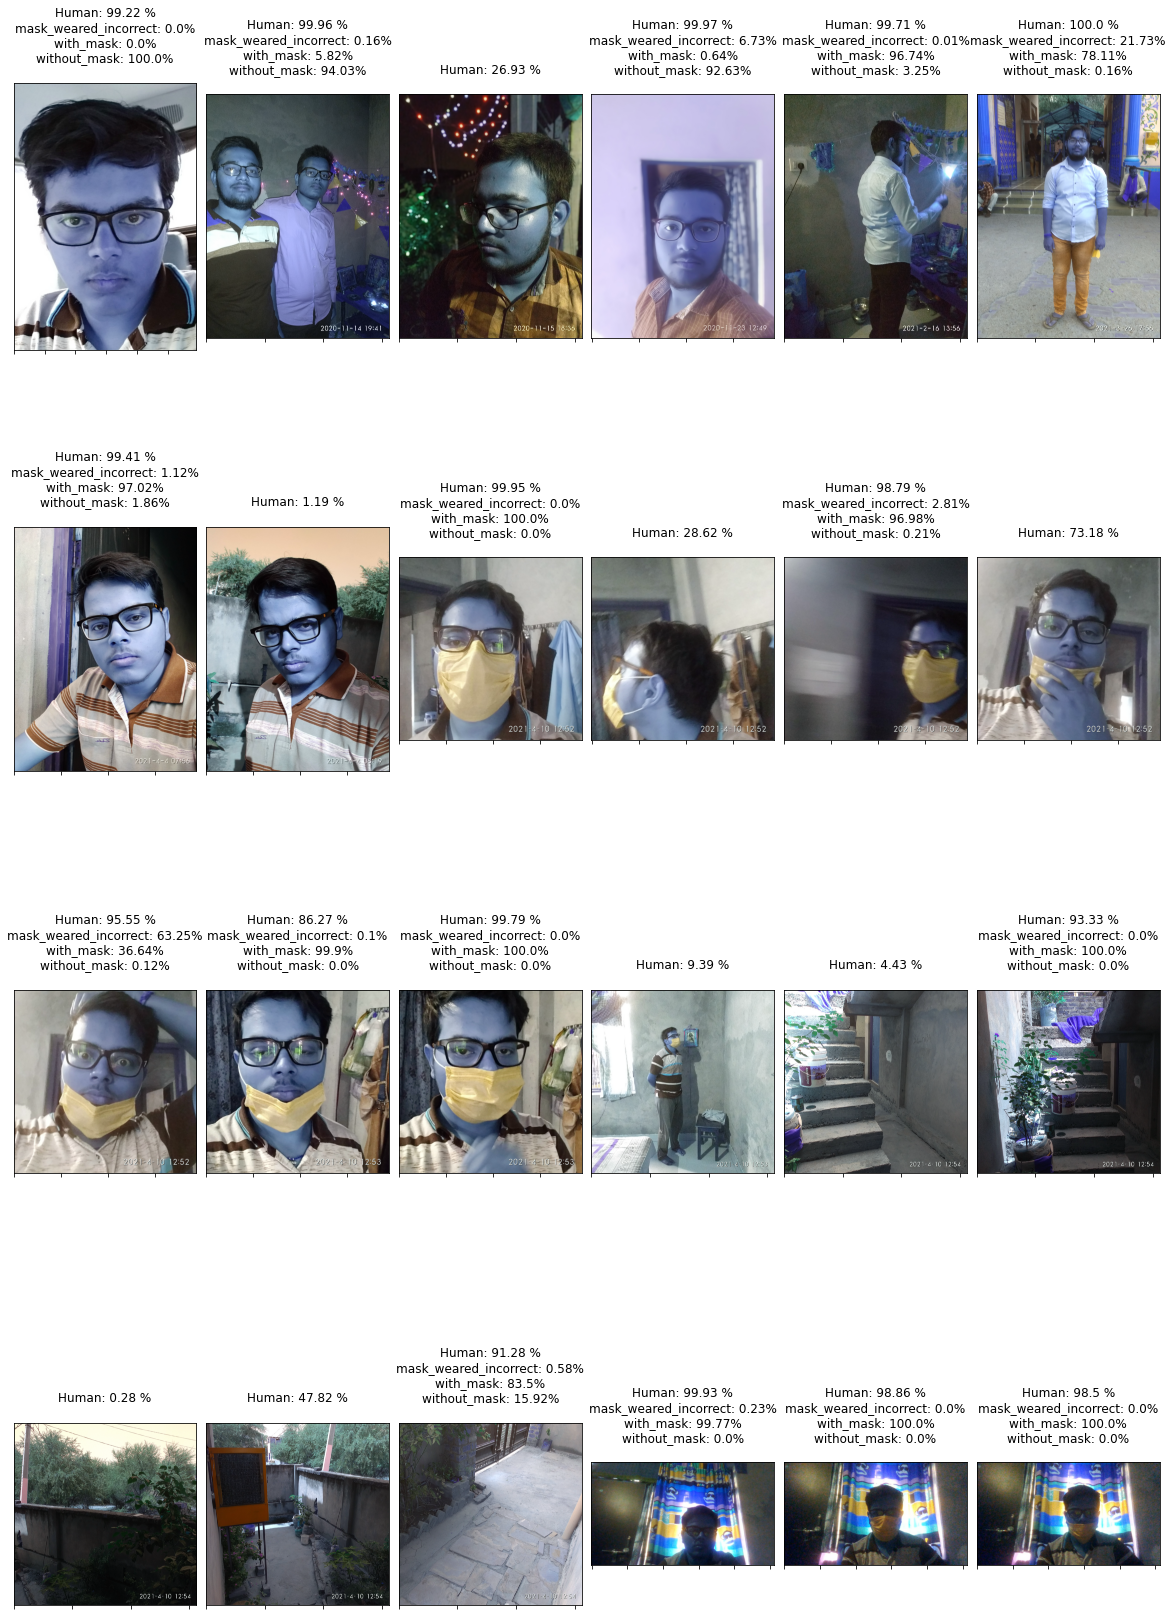

In [67]:
fig,ax=plt.subplots(4,6,figsize=(16,24),constrained_layout=True)
testdir=r'C:\Users\saurabh\Documents\Desktop\Neural Network and Deep Learning\Mask Detection\testimages'
testimg=os.listdir(testdir)
i=0
for axes in ax:
    for axis in axes:
        img=cv2.imread((os.path.join(testdir,testimg[i])))
        axis.imshow(img)
        axis.set(yticklabels=[]) 
        axis.tick_params(left=False)
        axis.set(xticklabels=[]) 
        axis.tick_params(left=False)
        temphuman=cv2.resize(img,(32,32))
        temphuman=temphuman/255.0
        temphuman=temphuman.reshape(1,32,32,3)
        Human_Val=human_model.predict([temphuman])[0]

        tempmask=cv2.resize(img,(40,40))
        tempmask=tempmask/255.0
        tempmask=tempmask.reshape(1,40,40,3)
        Mask_Val=new_model.predict([tempmask])[0]
        title='Human: {} %'.format(round(Human_Val[1]*100,2))+'\n'
        if Human_Val[1]>=0.8:
            for j in range(len(Mask_Val)):
                title+='{}: {}%'.format(label_encoder.inverse_transform([j])[0],round(Mask_Val[j]*100,2))+'\n'
        
        axis.set_title(title)
        i+=1
        

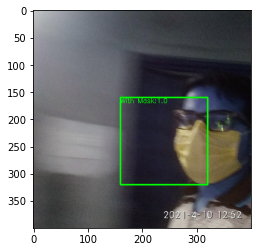

In [112]:
def BoxPredict(img):
    aspect_ratio=img.shape[0]/img.shape[1]
    image=cv2.resize(img,(int(400/aspect_ratio),400))
    rectangles=[]
    for length in range(80,min(image.shape[0],image.shape[1]),40):###
        for x in range(0,image.shape[0]-length,int(length)):###
            for y in range(0,image.shape[1]-length,int(length)//2):###
                gray=image[x:x+length,y:y+length,:]
                temp=cv2.resize(gray,(32,32))
                temp=temp/255.0
                temp=temp.reshape(1,32,32,3)
                Human_Val=human_model.predict([temp])[0]
                if Human_Val[1]>=0.99:###
                    gray=cv2.resize(gray,(40,40))
                    gray=gray/255.0
                    gray=gray.reshape(1,40,40,3)
                    Pred_Val=new_model.predict([gray])[0]
                    if label_encoder.inverse_transform([np.where(Pred_Val==max(Pred_Val))[0][0]])[0]=='mask_weared_incorrect':
                        rectangles.append([x,y,length,max(Pred_Val),'mask_weared_incorrect'])
                    elif label_encoder.inverse_transform([np.where(Pred_Val==max(Pred_Val))[0][0]])[0]=='without_mask':
                        rectangles.append([x,y,length,max(Pred_Val),'without_mask'])
                    elif label_encoder.inverse_transform([np.where(Pred_Val==max(Pred_Val))[0][0]])[0]=='with_mask':
                        rectangles.append([x,y,length,max(Pred_Val),'with_mask'])
                        
    rectangles=sorted(rectangles,key=lambda x:x[3],reverse=True)
    for i in range(len(rectangles)):
        if rectangles[i][3]<0.99:###
            break
    rectangles=rectangles[:i]
    rectangles=sorted(rectangles,key=lambda x:x[2],reverse=True)
    rectangles=rectangles[:len(rectangles)//3]
    
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    for rectangle in rectangles:
        if rectangle[4]=='mask_weared_incorrect':
            image=cv2.rectangle(image,(rectangle[0],rectangle[1]),(rectangle[0]+rectangle[2],rectangle[1]+rectangle[2]),(0,255,255),2)
            cv2.putText(image,'Mask Incorrect:{}'.format(round(float(rectangle[3]),2)),(rectangle[0],rectangle[1]+10), font, 0.4,(0,255,255),1)
        elif rectangle[4]=='without_mask':
            image=cv2.rectangle(image,(rectangle[0],rectangle[1]),(rectangle[0]+rectangle[2],rectangle[1]+rectangle[2]),(0,0,255),2)
            cv2.putText(image,'Without Mask:{}'.format(round(float(rectangle[3]),2)),(rectangle[0],rectangle[1]+10), font, 0.4,(0,0,255),1)
        elif rectangle[4]=='with_mask':
            image=cv2.rectangle(image,(rectangle[0],rectangle[1]),(rectangle[0]+rectangle[2],rectangle[1]+rectangle[2]),(0,255,0),2)
            cv2.putText(image,'With Mask:{}'.format(round(float(rectangle[3]),2)),(rectangle[0],rectangle[1]+10), font, 0.4,(0,255,0),1)
    return image


testdir=r'C:\Users\saurabh\Documents\Desktop\Neural Network and Deep Learning\Mask Detection\testimages'
testimg=os.listdir(testdir)
loc=os.path.join(testdir,testimg[10])
img=cv2.imread(loc)
img=BoxPredict(img)
plt.imshow(img)
cv2.imshow("BoxLayout", img)
cv2.waitKey(0)
cv2.destroyAllWindows()